# [Pandas](http://pandas.pydata.org)

Библиотека для работы с данными и таблицами в питоне.

In [2]:
import numpy as np
import pandas as pd

## Основные стурктуры

Основными структурами данных в **Pandas** являются классы **Series** и **DataFrame**.  
Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Мы можем думать о Series как о векторе из [numpy](https://numpy.org/).  

## [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

Одномерный индексированный массив данных некоторого фиксированного типа. Мы можем думать о Series как о векторе из [numpy](https://numpy.org/).

In [19]:
salaries = pd.Series(data = [80000, 67000, 75000], 
           index = ['Андрей', 'Владимир', 'Анна']) 
print(salaries)        

Андрей      80000
Владимир    67000
Анна        75000
dtype: int64


In [17]:
type(salaries)

pandas.core.series.Series

Посмотрим на среднюю зарплату.  
Функции numpy принимают pd.Series, так как для него они выглядят как np.array. Можно проделать двумя способами

In [20]:
np.mean(salaries), salaries.mean()

(74000.0, 74000.0)

Посмотрим на людей, чья зарплата выше средней:

In [21]:
salaries[salaries > salaries.mean()] #по сути используем булев маску в numpy array

Андрей    80000
Анна      75000
dtype: int64

Мы можем обращаться к элементам pd.Series как `salaries['Name']` или `salaries.Name`. Например:

In [22]:
salaries.Андрей, salaries['Андрей']

(80000, 80000)

Можно добавлять новые элементы, обращаясь к несуществующему элементу:

In [23]:
salaries['Кот'] = 100500
salaries

Андрей       80000
Владимир     67000
Анна         75000
Кот         100500
dtype: int64

Индексом может быть строка, состоящая из нескольких слов.  
Также, значением в pd.Series может быть `None`, точнее, его аналог в `numpy - np.nan` (not a number):  

In [24]:
salaries['Шрек Третий'] = np.nan
salaries

Андрей          80000.0
Владимир        67000.0
Анна            75000.0
Кот            100500.0
Шрек Третий         NaN
dtype: float64

В данных часто бывают пропуски, поэтому вы часто будете видеть `np.nan`.  
Важно уметь находить их и обрабатывать.  
Получим битовую маску для пропущенных значений: 

In [25]:
salaries.isnull()

Андрей         False
Владимир       False
Анна           False
Кот            False
Шрек Третий     True
dtype: bool

In [26]:
salaries[salaries.isnull()]

Шрек Третий   NaN
dtype: float64

Назначим минимальную зарплату всем, у кого ее нет: 

In [27]:
salaries[salaries.isnull()] = 1
salaries

Андрей          80000.0
Владимир        67000.0
Анна            75000.0
Кот            100500.0
Шрек Третий         1.0
dtype: float64

## [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

**Dataframe** - это двухмерная структура данных (матрица), представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. 

Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

### Создание Датафрейма 

Создадим pd.DataFrame из единичной numpy-матрицы:

In [28]:
df = pd.DataFrame(data = np.eye(3), 
                  index=['a', 'b', 'c'], 
                  columns=['col1', 'col2', 'col3'],
                  dtype=int)
df

,col1,col2,col3
a,1,0,0
b,0,1,0
c,0,0,1


Можно создавать pd.DataFrame из словаря.  
Ключами будут названия столбцов, а значениями - списки значений в этих столбцах.  
pd.DataFrame может хранить значения любых типов. Но в пределах одного столбца тип может быть только один:  

In [30]:
dictionary = {
    'A': np.arange(3),
    'B': ['a', 'b', 'c'],
    'C': np.arange(3) > 1
}
df = pd.DataFrame(dictionary)
df

,A,B,C
0,0,a,False
1,1,b,False
2,2,c,True


Столбцу присваивается тип numpy.array, из которого он появился.

In [31]:
df.dtypes

A     int64
B    object
C      bool
dtype: object

## Индексация

Можем обращаться к отдельному элементу в таблице через `at` (это быстро):

In [32]:
df.at[2, 'B']

'c'

Можем обращаться к куску таблицы через loc (это всего лишь в [22 раза медленнее](https://stackoverflow.com/questions/37216485/pandas-at-versus-loc), чем at):

In [33]:
df.loc[1:2, ['A', 'B']]

,A,B
1,1,b
2,2,c


Обращение только к строке:

In [34]:
df.loc[2]

A       2
B       c
C    True
Name: 2, dtype: object

Взять слайс по строкам

In [35]:
df.loc[1:3]

,A,B,C
1,1,b,False
2,2,c,True


Обращение только к столбцу.
Если мы хотим выделить все элементы по какой-то координате, можно написать просто `':'`:

In [36]:
df.loc[:, 'A']

0    0
1    1
2    2
Name: A, dtype: int64

Чтобы обращаться к столбцу по индексу(они там есть, хоть явно и не указаны) можно воспользоваться функцией `iloc`, которая работает аналогично `loc`

In [48]:
df.iloc[1:3, 1:3]

,B,C
1,b,False
2,Z,True


Можем изменять элементы, обращаясь к ним через `at` и присваивая значение:

In [37]:
df.at[2, 'B'] = 'Z'
df

,A,B,C
0,0,a,False
1,1,b,False
2,2,Z,True


С помощью loc можно изменять сразу всю строку.  
И даже создавать новые, смотрите:

In [54]:
df.loc[17] = [77, '!', False]
df

,A,B,C
0,0,a,False
1,1,b,False
2,2,Z,True
17,77,!,False


Заметим, что индексы вообще говоря идут совсем не подряд и даже не по-порядку. Да и вообще они могут быть не числовыми (об этом позднее во вкладке groupby)

In [55]:
df.loc[9] = [77, '!', False]
df

,A,B,C
0,0,a,False
1,1,b,False
2,2,Z,True
17,77,!,False
9,77,!,False


Чтобы удалить строки, можно воспользоваться функцией `drop`

In [56]:
df = df.drop([1,9,17])
df

,A,B,C
0,0,a,False
2,2,Z,True


## Обработка Nan значений

Создадим копию нашей таблицы без последнего столбца.  
Затем, присоединим новую таблицу к старой и посмотрим, что будет.

In [57]:
df_copy = df.copy().loc[:, ['A', 'B']]
df_copy = df.append(df_copy)
df_copy

,A,B,C
0,0,a,False
2,2,Z,True
0,0,a,NaN
2,2,Z,NaN


Jupyter автоматически выводит последнее значение в ячейке.  
Многие методы pandas не изменяют оригинальную таблицу, а возвращают копию.  
Давайте выкинем все строки, в которых есть NaN:

In [58]:
df_copy.dropna(axis=0)

,A,B,C
0,0,a,False
2,2,Z,True


Вместо строк можно убрать столбцы, в которых есть NaN.  
Для этого нужно передать параметр `axis=1`:

In [59]:
df_copy.dropna(axis=1)

,A,B
0,0,a
2,2,Z
0,0,a
2,2,Z


В результате выполнения этих методов наша таблица не изменилась, потому что возвращалась копия.  
Заменим все NaN каким-то значением:

In [60]:
df_copy.fillna(False)

,A,B,C
0,0,a,False
2,2,Z,True
0,0,a,False
2,2,Z,False


## Чтение из файла и первичный анализ

Прочитаем данные и посмотрим на первые 5 строк с помощью метода `head`:

In [62]:
df = pd.read_csv('data/telecom_churn.csv')

Можно читать данные абсолютно разных форматов `.csv`, `.tsv` или `.xlsx`. 

In [63]:
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


Можно также делать срезы по фрейму

В Jupyter-ноутбуках датафреймы `Pandas` выводятся в виде вот таких красивых табличек, и `print(df.head())` выглядит хуже.

In [ ]:
print(df.head(7))

### Настройки Pandas

Кстати, по умолчанию `Pandas` выводит всего 20 столбцов и 60 строк, поэтому если ваш датафрейм больше, воспользуйтесь функцией `set_option`:

In [240]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)

In [241]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


А также укажем значение параметра `presicion` равным 2, чтобы отображать два знака после запятой (а не 6, как установлено по умолчанию.

In [72]:
pd.set_option('precision', 2)

### Типы данных 


In [243]:
df.shape

(3333, 20)

Видим, что в таблице 3333 строки и 20 столбцов. Выведем названия столбцов:

In [242]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

Чтобы посмотреть общую информацию по датафрейму и всем признакам, воспользуемся методом **`info`**:

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


`bool`, `int64`, `float64` и `object` — это типы признаков. Видим, что 1 признак — логический (`bool`), 3 признака имеют тип `object` и 16 признаков — числовые.

**Изменить тип колонки** можно с помощью метода `astype`. Применим этот метод к признаку `Churn` и переведём его в `int64`:

In [246]:
df['Churn'] = df['Churn'].astype('int64')

In [248]:
df['Churn']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
       ..
3323    1
3324    0
3325    0
3326    0
3327    0
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

Метод **`describe`** показывает основные статистические характеристики данных по каждому числовому признаку (типы `int64` и `float64`): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [249]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


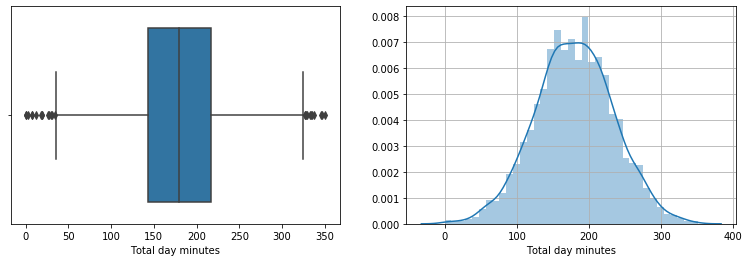

In [124]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.boxplot(df['Total day minutes'])
plt.subplot(1, 2, 2)
sns.distplot(df['Total day minutes']);
plt.grid()

Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре `include`. Можно также задать `include`='all', чтоб вывести статистику по всем имеющимся признакам.

In [250]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Для категориальных (тип `object`) и булевых (тип `bool`) признаков  можно воспользоваться методом **`value_counts`**. Посмотрим на распределение нашей целевой переменной — `Churn`:

In [251]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 пользователей из 3333 — лояльные, значение переменной `Churn` у них — `0`.

Посмотрим на распределение пользователей по переменной `Area code`. Укажем значение параметра `normalize=True`, чтобы посмотреть не абсолютные частоты, а относительные.

In [252]:
df['Area code'].value_counts(normalize=True)

415    0.50
510    0.25
408    0.25
Name: Area code, dtype: float64

## Матрица корреляции

In [122]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), vmax=.8, square=True, cmap='magma');

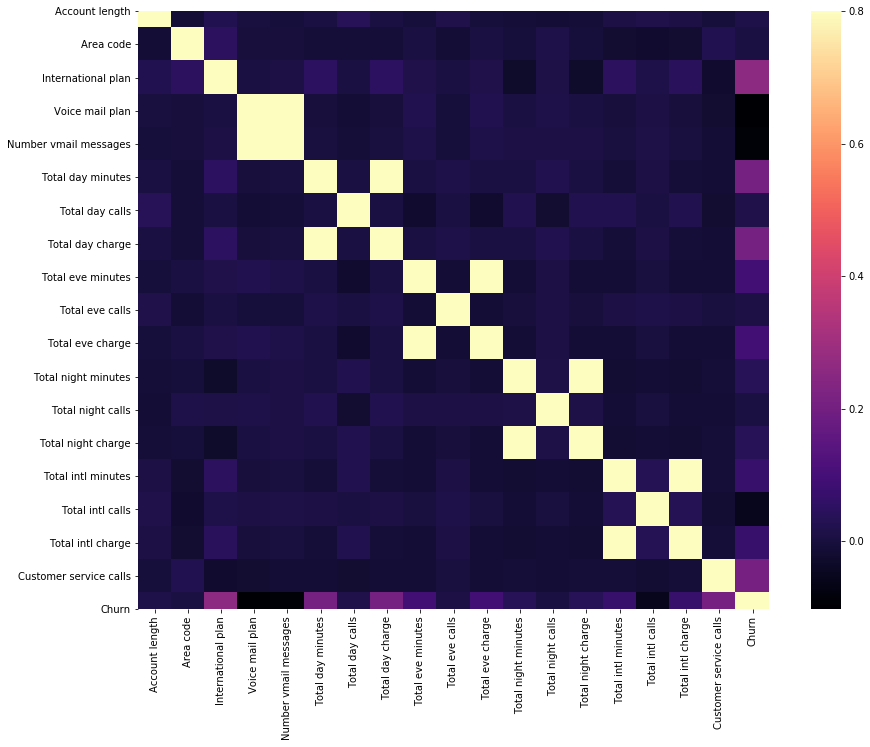

## Сортировка

`DataFrame` можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по `Total day charge` (`ascending=False` для сортировки по убыванию):

In [253]:
df.sort_values(by='Total day charge', ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


Сортировать можно и по группе столбцов:

In [82]:
df.sort_values(by=['Churn', 'Total day charge'],
               ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


## Больше индексации

`DataFrame` можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из датафрейма на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида `DataFrame['Name']`. Воспользуемся этим для ответа на вопрос: **какова доля нелояльных пользователей в нашем датафрейме?**

In [83]:
df['Churn'].mean()

0.14491449144914492

14,5% — довольно плохой показатель для компании, с таким процентом оттока можно и разориться.

Очень удобной является логическая индексация `DataFrame` по одному столбцу. Выглядит она следующим образом: `df[P(df['Name'])]`, где `P` - это некоторое логическое условие, проверяемое для каждого элемента столбца `Name`. Итогом такой индексации является `DataFrame`, состоящий только из строк, удовлетворяющих условию `P` по столбцу `Name`. 

Воспользуемся этим для ответа на вопрос: **каковы средние значения числовых признаков среди нелояльных пользователей?**

In [257]:
df[df['Churn'] == 1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

Скомбинировав предыдущие два вида индексации, ответим на вопрос: **сколько в среднем в течение дня разговаривают по телефону нелояльные пользователи**?

In [258]:
type(df[df['Churn'] == 1]['Total day minutes'].mean())

numpy.float64

**Какова максимальная длина международных звонков среди лояльных пользователей (`Churn == 0`), не пользующихся услугой международного роуминга (`'International plan' == 'No'`)?**

In [86]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

Метод `ix` индексирует и по названию, и по номеру, но он вызывает путаницу, и поэтому был объявлен устаревшим (deprecated).

Если нам нужна первая или последняя строчка датафрейма, пользуемся конструкцией `df[:1]` или `df[-1:]`:

In [259]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


## Применение функций: `apply`, `map` и др.

**Применение функции к каждому столбцу:**

In [260]:
df.apply(np.max) 

State                          WY
Account length                243
Area code                     510
International plan            Yes
Voice mail plan               Yes
Number vmail messages          51
Total day minutes         3.5e+02
Total day calls               165
Total day charge               60
Total eve minutes         3.6e+02
Total eve calls               170
Total eve charge               31
Total night minutes         4e+02
Total night calls             175
Total night charge             18
Total intl minutes             20
Total intl calls               20
Total intl charge             5.4
Customer service calls          9
Churn                           1
dtype: object

Метод `apply` можно использовать и для того, чтобы применить функцию к каждой строке. Для этого нужно указать `axis=1`.

**Применение функции к каждой ячейке столбца**

Допустим, по какой-то причине нас интересуют все люди из штатов, названия которых начинаются на 'W'. В данному случае это можно сделать по-разному, но наибольшую свободу дает связка `apply`-`lambda` – применение функции ко всем значениям в столбце.

In [261]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


Метод `map` можно использовать и для **замены значений в колонке**, передав ему в качестве аргумента словарь вида `{old_value: new_value}`:

In [263]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Аналогичную операцию можно провернуть с помощью метода `replace`:

In [264]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Группировка данных

В общем случае группировка данных в Pandas выглядит следующим образом:

```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. К датафрейму применяется метод **`groupby`**, который разделяет данные по `grouping_columns` – признаку или набору признаков.
3. Индексируем по нужным нам столбцам (`columns_to_show`). 
2. К полученным группам применяется функция или несколько функций.

**Группирование данных в зависимости от значения признака `Churn` и вывод статистик по трём столбцам в каждой группе.**

In [265]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

Сделаем то же самое, но немного по-другому, передав в `agg` список функций:

In [267]:
df.groupby(['Churn']).count()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,,,,
0,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850
1,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483


In [95]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

## Сводные таблицы

Допустим, мы хотим посмотреть, как наблюдения в нашей выборке распределены в контексте двух признаков — `Churn` и `Customer service calls`. Для этого мы можем построить **таблицу сопряженности**, воспользовавшись методом **`crosstab`**:

In [269]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [270]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


Мы видим, что большинство пользователей — лояльные и пользуются дополнительными услугами (международного роуминга / голосовой почты).

Продвинутые пользователи `Excel` наверняка вспомнят о такой фиче, как **сводные таблицы** (`pivot tables`). В `Pandas` за сводные таблицы отвечает метод **`pivot_table`**, который принимает в качестве параметров:

* `values` – список переменных, по которым требуется рассчитать нужные статистики,
* `index` – список переменных, по которым нужно сгруппировать данные,
* `aggfunc` — то, что нам, собственно, нужно посчитать по группам — сумму, среднее, максимум, минимум или что-то ещё.

Давайте посмотрим среднее число дневных, вечерних и ночных звонков для разных `Area code`:

In [277]:
df.pivot_table(values = ['Total day calls', 'Total eve calls', 'Total night calls'], 
               index = ['Area code'], 
               aggfunc= lambda X: len(X))


,Total day calls,Total eve calls,Total night calls
Area code,,,
408,838,838,838
415,1655,1655,1655
510,840,840,840


### Преобразование датафреймов

Как и многие другие вещи, добавлять столбцы в `DataFrame` можно несколькими способами.

Например, мы хотим посчитать общее количество звонков для всех пользователей. Создадим объект `total_calls` типа `Series` и вставим его в датафрейм:

In [281]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
df.insert(loc=2, column='Total calls', value=total_calls) 
# loc - номер столбца, после которого нужно вставить данный Series
# мы указали len(df.columns), чтобы вставить его в самом конце
df.head()

ValueError: cannot insert Total calls, already exists

Добавить столбец из имеющихся можно и проще, не создавая промежуточных `Series`:

In [282]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']

df.head()

,State,Account length,Total calls,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,303,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,332,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,333,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,255,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,359,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


Чтобы удалить столбцы или строки, воспользуйтесь методом `drop`, передавая в качестве аргумента нужные индексы и требуемое значение параметра `axis` (`1`, если удаляете столбцы, и ничего или `0`, если удаляете строки):

In [283]:
# избавляемся от созданных только что столбцов
df = df.drop(['Total charge', 'Total calls'], axis=1) 

df.drop()

df.drop([1, 2]).head() # а вот так можно удалить строчки

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [284]:
df = df.drop(0, axis=0) 

In [285]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,415,True,False,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,408,False,False,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,415,True,True,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
10,IN,65,415,False,False,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1


--------



## Первые попытки прогнозирования оттока


Посмотрим, как отток связан с признаком **"Подключение международного роуминга"** (`International plan`). Сделаем это с помощью сводной таблички `crosstab`, а также путем иллюстрации с `Seaborn` (как именно строить такие картинки и анализировать с их помощью графики – материал следующей статьи.)

In [286]:
# надо дополнительно установить (команда в терминале)
# чтоб картинки рисовались в тетрадке
# !conda install seaborn 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

In [287]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,False,True,All
Churn,,,
0,2663,186,2849
1,346,137,483
All,3009,323,3332


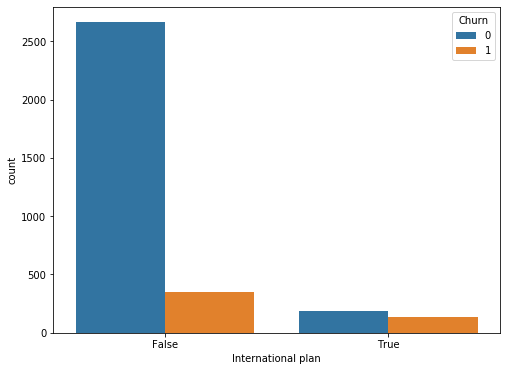

In [288]:
sns.countplot(x='International plan', hue='Churn', data=df);

Видим, что когда роуминг подключен, доля оттока намного выше – интересное наблюдение! Возможно, большие и плохо контролируемые траты в роуминге очень конфликтогенны и приводят к недовольству клиентов телеком-оператора и, соответственно, к их оттоку. 

Далее посмотрим на еще один важный признак – **"Число обращений в сервисный центр"** (`Customer service calls`). Также построим сводную таблицу и картинку.

In [291]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True, normalize=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,0.18,0.32,0.20,0.12,0.03,7.80e-03,2.40e-03,1.20e-03,3.00e-04,0.00e+00,0.86
1,0.03,0.04,0.03,0.01,0.02,1.20e-02,4.20e-03,1.50e-03,3.00e-04,6.00e-04,0.14
All,0.21,0.35,0.23,0.13,0.05,1.98e-02,6.60e-03,2.70e-03,6.00e-04,6.00e-04,1.00


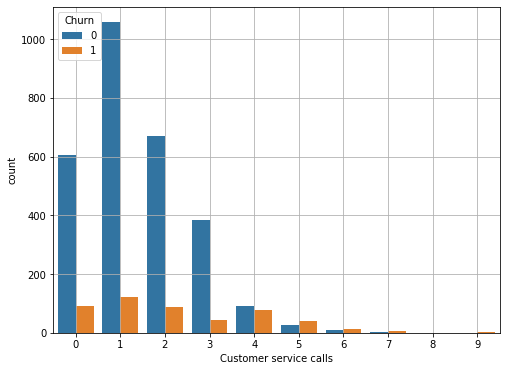

In [292]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.grid()

Может быть, по сводной табличке это не так хорошо видно (или скучно ползать взглядом по строчкам с цифрами), а вот картинка красноречиво свидетельствует о том, что доля оттока сильно возрастает начиная с 4 звонков в сервисный центр. 

Добавим теперь в наш DataFrame бинарный признак — результат сравнения `Customer service calls > 3`. И еще раз посмотрим, как он связан с оттоком. 

In [293]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2720,345,3065
1,129,138,267
All,2849,483,3332


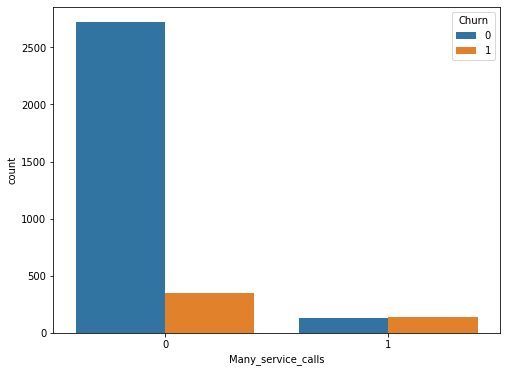

In [295]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);

Объединим рассмотренные выше условия и построим сводную табличку для этого объединения и оттока.

In [48]:
pd.crosstab(df['Many_service_calls'] & df['International plan'] , 
            df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Значит, прогнозируя отток клиента в случае, когда число звонков в сервисный центр больше 3 и подключен роуминг (и прогнозируя лояльность – в противном случае), можно ожидать около 85.8% правильных попаданий (ошибаемся всего 464 + 9 раз). Эти 85.8%, которые мы получили с помощью очень простых рассуждений – это неплохая отправная точка (*baseline*) для дальнейших моделей машинного обучения, которые мы будем строить. 

В целом до появления машинного обучения процесс анализа данных выглядел примерно так. Прорезюмируем:
    
- Доля лояльных клиентов в выборке – 85.5%. Самая наивная модель, ответ которой "Клиент всегда лоялен" на подобных данных будет угадывать примерно в  85.5% случаев. То есть доли правильных ответов (*accuracy*) последующих моделей должны быть как минимум не меньше, а лучше, значительно выше этой цифры;
- С помощью простого прогноза , который условно можно выразить такой формулой: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", можно ожидать долю угадываний 85.8%, что еще чуть выше 85.5%
- Эти два бейзлайна мы получили без всякого машинного обучения, и они служат отправной точной для наших последующих моделей. Если окажется, что мы громадными усилиями увеличиваем долю правильных ответов всего, скажем, на 0.5%, то возможно, мы что-то делаем не так, и достаточно ограничиться простой моделью из двух условий. 
- Перед обучением сложных моделей рекомендуется немного покрутить данные и проверить простые предположения. Более того, в бизнес-приложениях машинного обучения чаще всего начинают именно с простых решений, а потом экспериментируют с их усложнением. 

----------

## Текстовая аналитика

Скачаем данные о выпущенных книгах с издательствами.

In [126]:
articles=pd.read_csv('articles.csv')

In [296]:
articles.head()

,id,title,publication,author,date,year,month,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017,6,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017,1,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017,4,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017,1,"SEOUL, South Korea — North Korea’s leader, ..."


### Сложная группировка

Хотим группировать по году и по издательству.

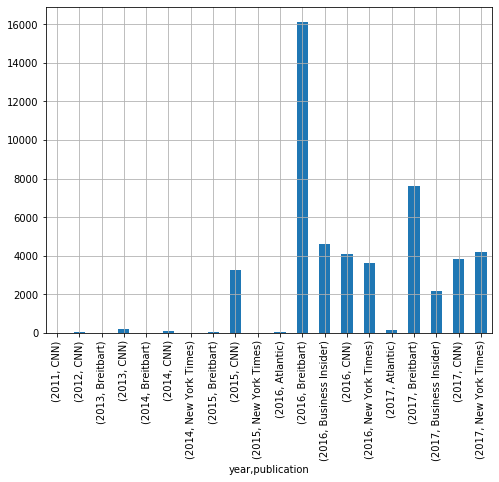

In [153]:
a = articles.groupby(['year','publication']).count()
a['id'].plot(kind='bar')
plt.grid()

## Reset_Index

Если возьмем срез книг по году, индексы останутся прежними, с этим надо что-то сделать.

In [297]:
book2015  = articles[articles['year'] == 2015]

In [298]:
book2015.head()

,id,title,publication,author,date,year,month,content
5631,23619,The Pillow Cure - The New York Times,New York Times,Penelope Green,2015-03-26,2015,3,My neck is killing me. Isn’t yours? My shoulde...
5780,23826,Simple Rules for Healthy Eating - The New York...,New York Times,Aaron E. Carroll,2015-12-28,2015,12,"Over the past few months, I’ve written a numbe..."
6765,25139,"Drink to Your Health (in Moderation), the Scie...",New York Times,Aaron E. Carroll,2015-12-22,2015,12,"Over the past year, I’ve tried to clear up a l..."
15469,34206,"2015: The Year of Anti-Christian Jihad, ‘Chris...",Breitbart,"Thomas D. Williams, Ph.D.",2015-12-31,2015,12,The year 2015 will go down in memory as a peri...
15810,34547,Ted Cruz Super PACs Book $4 Million for Iowa a...,Breitbart,Mike Flynn,2015-12-31,2015,12,"Stand for Truth and Keep the Promise, super PA..."


In [169]:
book2015.reset_index()

,index,id,title,publication,author,date,year,month,content
0,5631,23619,The Pillow Cure - The New York Times,New York Times,Penelope Green,2015-03-26,2015,3,My neck is killing me. Isn’t yours? My shoulde...
1,5780,23826,Simple Rules for Healthy Eating - The New York...,New York Times,Aaron E. Carroll,2015-12-28,2015,12,"Over the past few months, I’ve written a numbe..."
2,6765,25139,"Drink to Your Health (in Moderation), the Scie...",New York Times,Aaron E. Carroll,2015-12-22,2015,12,"Over the past year, I’ve tried to clear up a l..."
3,15469,34206,"2015: The Year of Anti-Christian Jihad, ‘Chris...",Breitbart,"Thomas D. Williams, Ph.D.",2015-12-31,2015,12,The year 2015 will go down in memory as a peri...
4,15810,34547,Ted Cruz Super PACs Book $4 Million for Iowa a...,Breitbart,Mike Flynn,2015-12-31,2015,12,"Stand for Truth and Keep the Promise, super PA..."
5,15944,34681,Jeb: Trump Is a ‘Creature of Barack Obama’ - V...,Breitbart,Pam Key,2015-12-31,2015,12,"Wednesday in a interview with NPR, Republican ..."
6,16150,34887,Trump: I Think I’ll Be Hillary’s ’Worst Nightm...,Breitbart,Trent Baker,2015-12-31,2015,12,Fox News Channel welcomed in 2016 with GOP pre...
7,16369,35107,NY: Man Arrested for Plotting New Year’s Islam...,Breitbart,Jordan Schachtel,2015-12-31,2015,12,"Federal officials have arrested a Rochester, N..."
8,16538,35276,Fire Engulfs 63-Story Five-Star Hotel in Dubai,Breitbart,John Hayward,2015-12-31,2015,12,"Some 20 floors of the The Address hotel, a ..."
9,16955,35694,Why Western Civilization Has Lost Its Self-Con...,Breitbart,Michael Patrick Leahy,2015-12-31,2015,12,When did we give up? And can we reenergize Wes...


In [171]:
book2015.reset_index(drop=True).head()

,id,title,publication,author,date,year,month,content
0,23619,The Pillow Cure - The New York Times,New York Times,Penelope Green,2015-03-26,2015,3,My neck is killing me. Isn’t yours? My shoulde...
1,23826,Simple Rules for Healthy Eating - The New York...,New York Times,Aaron E. Carroll,2015-12-28,2015,12,"Over the past few months, I’ve written a numbe..."
2,25139,"Drink to Your Health (in Moderation), the Scie...",New York Times,Aaron E. Carroll,2015-12-22,2015,12,"Over the past year, I’ve tried to clear up a l..."
3,34206,"2015: The Year of Anti-Christian Jihad, ‘Chris...",Breitbart,"Thomas D. Williams, Ph.D.",2015-12-31,2015,12,The year 2015 will go down in memory as a peri...
4,34547,Ted Cruz Super PACs Book $4 Million for Iowa a...,Breitbart,Mike Flynn,2015-12-31,2015,12,"Stand for Truth and Keep the Promise, super PA..."


### Строковые операции

Сделаем датафрейм только авторов

In [178]:
author = articles[['author']].fillna('Noname')

In [179]:
author.head()

,author
0,Carl Hulse
1,Benjamin Mueller and Al Baker
2,Margalit Fox
3,William McDonald
4,Choe Sang-Hun


In [180]:
lone_authors = author[~author['author'].str.contains(' and |&', regex=True)]

In [308]:
lone_authors.head(10)

,author
0,Carl Hulse
2,Margalit Fox
3,William McDonald
4,Choe Sang-Hun
5,Sewell Chan
6,Javier C. Hernández
7,Gina Kolata
8,Katherine Rosman
9,Andy Newman
10,Justin Gillis


In [306]:
~author['author'].str.contains(' and |&', regex=True)

0         True
1        False
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
         ...  
49990     True
49991     True
49992     True
49993     True
49994     True
49995     True
49996     True
49997     True
49998     True
49999     True
Name: author, Length: 50000, dtype: bool

In [309]:
several_authors = author[author['author'].str.contains(' and |&', regex=True)]

In [310]:
several_authors.head()

,author
1,Benjamin Mueller and Al Baker
16,Kevin Sack and Alan Blinder
23,Guy Trebay and Jacob Bernstein
27,Sheri Fink and Helene Cooper
39,Eric Lipton and Matt Flegenheimer


In [311]:
split_authors = several_authors['author'].str.split(", | and | &amp ")

In [314]:
split_authors.at[1]

list

## Полезные материалы

* [Оптимизация Pandas для больших данных](https://habr.com/en/company/ruvds/blog/442516/)
* [Pandas for Data Analysis](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
* [Сборник полезных тетрадок по Pandas](https://github.com/HorusHeresyHeretic/Pandas_Practice)
* [Learn Pandas](https://bitbucket.org/hrojas/learn-pandas/src/master/)

## Источники материалов:
* [mlcourse.ai](https://github.com/Yorko/mlcourse.ai) - курс Машинного обучения с OpenDataScience
* [AI Seminars](https://github.com/AICommunityInno/Seminars) - семинары по Машинному обучению в Иннополисе
* [HSE-ML course](https://github.com/esokolov/ml-course-hse) - курс Машинного обучения ФКН ВШЭ